In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv


In [3]:
df=pd.read_csv("/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv")
df_test=pd.read_csv("/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv")
df_icml=pd.read_csv("/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv")

In [4]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
df_test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [6]:
df_icml.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
df_icml.rename(columns = {' Usage':'usage'}, inplace = True)
df_icml.rename(columns = {' pixels':'pixels'}, inplace = True)

In [8]:
df_icml["usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [9]:
df_icml = df_icml.loc[df_icml['usage'].isin(['PublicTest', 'PrivateTest'])]
df_icml.shape

(7178, 3)

In [10]:
df_icml

,emotion,usage,pixels
28709,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,PublicTest,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,PublicTest,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [11]:
print(df["emotion"].unique())

[0 2 4 6 3 5 1]


In [12]:
X = df['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(28709, 48, 48, 1)

In [13]:
y = df["emotion"]
y.shape

(28709,)

In [14]:
emotion = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')

([<matplotlib.axis.XTick at 0x7f2c194abed0>,
 [Text(0, 0, 'anger'),
  Text(1, 0, 'disgust'),
  Text(2, 0, 'fear'),
  Text(3, 0, 'happiness'),
  Text(4, 0, 'sadness'),
  Text(5, 0, 'surprise'),
  Text(6, 0, 'neutral')])

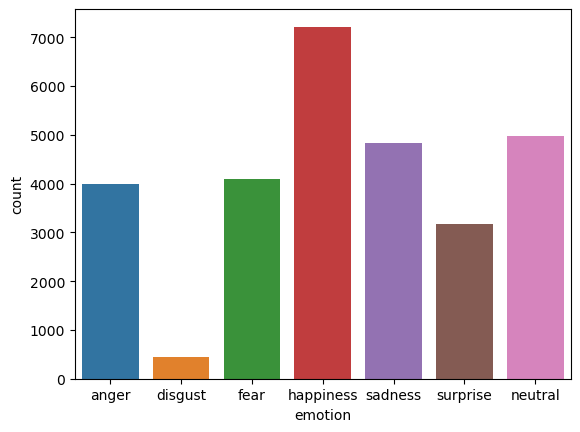

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.xticks(range(7), emotion)

Text(0.5, 1.0, 'happiness')

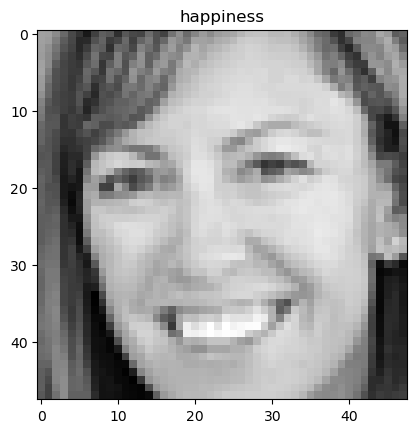

In [16]:
plt.imshow(X[46].reshape((48,48)), cmap='gray')
plt.title(emotion[y[46]])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
img_labels = le.fit_transform(y)
img_labels = to_categorical(img_labels)
img_labels.shape

(28709, 7)

In [18]:
X = X/255.

In [19]:
model = Sequential()
x = Conv2D(filters = 64,kernel_size = (5, 5),input_shape = (48, 48, 1),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')
model.add(x)
model.add(BatchNormalization())

model.add(Conv2D(filters = 64,kernel_size = (5, 5),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Flatten(name='flatten'))       
model.add(Dense(512,activation='relu',kernel_initializer='he_normal',))
model.add(BatchNormalization())   
model.add(Dropout(0.6))
model.add(Dense(7,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [21]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [22]:
early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]


In [23]:
gen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True
)
gen.fit(X)

In [24]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []

In [25]:
y = img_labels
for train_index, test_index in skf.split(X, y.argmax(1)): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    history = model.fit(X_train_fold, y_train_fold,epochs=5,callbacks=callbacks,batch_size=32) 
    lst_accu_stratified.append(model.evaluate(X_test_fold, y_test_fold))
    
    

Epoch 1/5


2023-03-20 12:13:38.900948: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


808/808 [==============================] - 29s 22ms/step - loss: 2.0293 - accuracy: 0.2916 - lr: 0.0010
Epoch 2/5
808/808 [==============================] - 17s 21ms/step - loss: 1.5051 - accuracy: 0.4263 - lr: 0.0010
Epoch 3/5
808/808 [==============================] - 17s 22ms/step - loss: 1.3208 - accuracy: 0.4949 - lr: 0.0010
Epoch 4/5
808/808 [==============================] - 18s 22ms/step - loss: 1.2514 - accuracy: 0.5219 - lr: 0.0010
Epoch 5/5
90/90 [==============================] - 1s 10ms/step - loss: 1.2079 - accuracy: 0.5531
Epoch 1/5
808/808 [==============================] - 17s 21ms/step - loss: 1.1411 - accuracy: 0.5713 - lr: 0.0010
Epoch 2/5
808/808 [==============================] - 17s 21ms/step - loss: 1.0891 - accuracy: 0.5915 - lr: 0.0010
Epoch 3/5
808/808 [==============================] - 17s 21ms/step - loss: 1.0502 - accuracy: 0.6068 - lr: 0.0010
Epoch 4/5
808/808 [==============================] - 17s 21ms/step - loss: 0.9853 - accuracy: 0.6327 - lr: 0.0010


In [26]:
acc = 0
for i in lst_accu_stratified:
    acc = acc+i[1]
print("Accuracy",acc/len(lst_accu_stratified))

Accuracy 0.8234406352043152


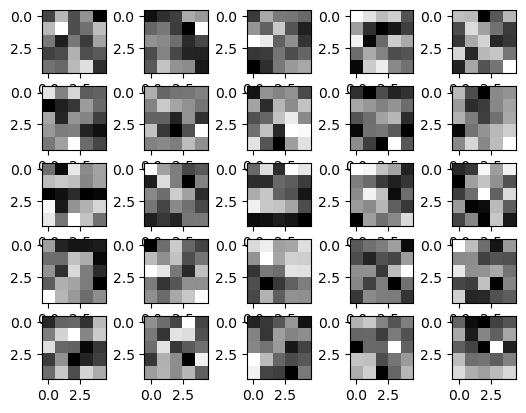

In [27]:
x1w = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [29]:
Image_test = X[46].reshape((48,48))
Image_test
print(X[46].shape)

(48, 48, 1)


In [30]:
x1w = x.get_weights()[0][:,:,0,:]
print(x1w)
print(x1w.shape)

[[[ 1.35761976e-01 -2.78629959e-01 -4.96375859e-01 ...  2.59198904e-01
    3.51278424e-01 -5.73344290e-01]
  [ 4.80613671e-02  2.84406602e-01 -3.29972744e-01 ...  4.41421717e-01
    6.64806902e-01 -8.40252638e-02]
  [-7.84265578e-01 -2.27384418e-01 -2.40559235e-01 ... -4.51620631e-02
    2.65856147e-01  1.94979012e-02]
  [-6.46790743e-01  1.05471618e-01  3.52791220e-01 ... -2.57526428e-01
   -6.76055074e-01 -3.72420670e-03]
  [ 4.68764722e-01 -6.22019887e-01  2.50375956e-01 ...  6.09444499e-01
    8.74421000e-02 -7.69112051e-01]]

 [[-4.91858214e-01  2.97888160e-01 -2.92472448e-02 ... -1.30134746e-01
   -3.45707923e-01 -7.39632770e-02]
  [-1.12312466e-01  6.45432770e-01  7.07426146e-02 ... -2.12765440e-01
   -1.88817129e-01 -1.69676855e-01]
  [-5.28151572e-01 -2.38844857e-01 -2.51896173e-01 ... -5.93771279e-01
    9.61687565e-02  4.94167954e-01]
  [ 4.76831406e-01 -5.65745607e-02 -5.89796305e-01 ...  4.04639453e-01
   -5.96737564e-01  6.44243538e-01]
  [ 1.34082273e-01  3.14963937e-01 

In [31]:
Conv_op = x(X[23].reshape(1,48,48,1)) # x is trained first conv layer
print(Conv_op.shape)

(1, 48, 48, 64)


In [32]:
Conv_op.numpy()


array([[[[0.05742507, 0.        , 0.        , ..., 0.15076   ,
          0.1064043 , 0.        ],
         [0.05021822, 0.        , 0.        , ..., 0.12119655,
          0.12380045, 0.        ],
         [0.08240777, 0.        , 0.        , ..., 0.09527113,
          0.1274037 , 0.        ],
         ...,
         [0.5926548 , 0.        , 0.        , ..., 0.        ,
          0.5582536 , 0.        ],
         [0.03665842, 0.        , 0.051851  , ..., 0.        ,
          0.05778721, 0.        ],
         [0.36091843, 0.        , 0.38643613, ..., 0.        ,
          0.14033335, 0.        ]],

        [[0.09324761, 0.        , 0.        , ..., 0.14474574,
          0.08564384, 0.        ],
         [0.08862954, 0.        , 0.        , ..., 0.11668171,
          0.09667977, 0.        ],
         [0.10077428, 0.        , 0.        , ..., 0.07640128,
          0.0712799 , 0.        ],
         ...,
         [0.32715344, 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

In [33]:
type(Conv_op)

tensorflow.python.framework.ops.EagerTensor

In [34]:
mean_tensor = np.mean(Conv_op, axis=-1)
mean_tensor.shape

(1, 48, 48)

In [35]:
np_array = np.array(mean_tensor)
np_array.shape

(1, 48, 48)

Image after first Convolution Layer

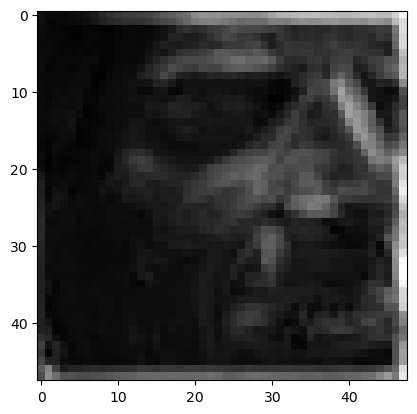

In [36]:
plt.imshow(np_array.reshape((48,48)), cmap='gray')

Input Image

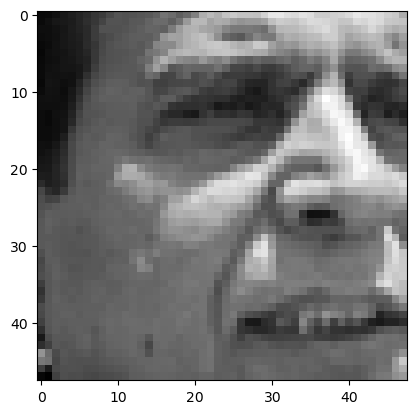

In [37]:
plt.imshow(X[23].reshape(48,48),cmap='gray')


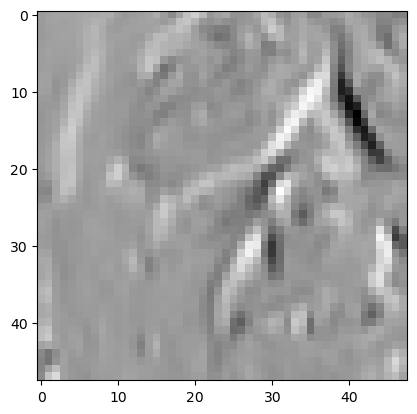

In [49]:
#using sobel filter
from scipy import ndimage
sobel_x = ndimage.sobel(X[23].reshape(48,48),axis=1)
sobel_y = ndimage.sobel(X[23].reshape(48,48),axis=0)
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
plt.imshow(sobel_x,cmap='gray')


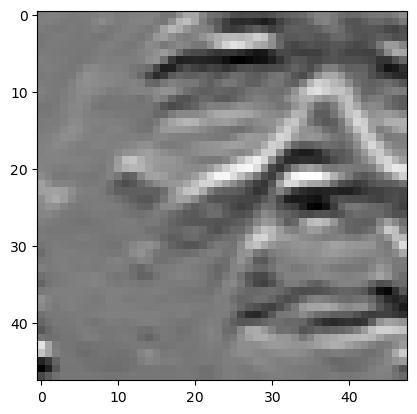

In [50]:
plt.imshow(sobel_y,cmap='gray')


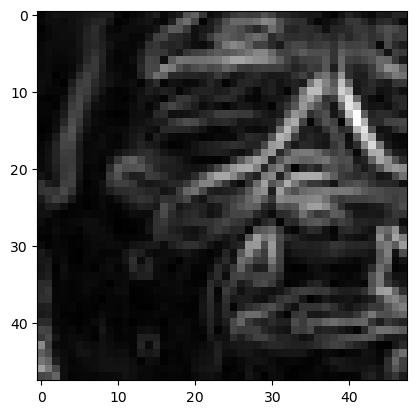

In [51]:
plt.imshow(sobel_mag,cmap='gray')